# Cancer Prediction System

# Accessing of the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

# Reading of the csv file

In [2]:
cancer=pd.read_csv(r"C:\Users\Harshini\Desktop\internship\edunet\project\Cancerdataset.csv")

# Data Exploration 

In [3]:
cancer.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16,0,1,8,4,1,1
1,71,0,31,0,1,9,4,0,0
2,48,1,39,0,2,5,5,0,1
3,34,0,30,0,0,10,2,0,0
4,62,1,35,0,0,5,3,0,1


In [4]:
cancer.tail()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25,0,0,10,1,0,1
1496,31,0,33,0,1,2,2,1,1
1497,63,1,33,1,1,0,0,0,1
1498,55,0,26,0,0,8,2,1,1
1499,67,1,24,0,0,3,3,1,0


In [5]:
cancer.shape

(1500, 9)

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1500 non-null   int64
 1   Gender            1500 non-null   int64
 2   BMI               1500 non-null   int64
 3   Smoking           1500 non-null   int64
 4   GeneticRisk       1500 non-null   int64
 5   PhysicalActivity  1500 non-null   int64
 6   AlcoholIntake     1500 non-null   int64
 7   CancerHistory     1500 non-null   int64
 8   Diagnosis         1500 non-null   int64
dtypes: int64(9)
memory usage: 105.6 KB


The Age are the integer values representing the patient's age, ranging from 20 to 80.

In [7]:
cancer["Gender"].unique()

array([1, 0], dtype=int64)

Binary values representing gender, where 0 indicates Male and 1 indicates Female.

In [8]:
cancer["BMI"].unique()

array([16, 31, 39, 30, 35, 37, 21, 20, 25, 36, 38, 24, 22, 26, 32, 17, 19,
       33, 29, 27, 40, 18, 23, 28, 34, 15], dtype=int64)

Integer values representing Body Mass Index, ranging from 15 to 40.

In [9]:
cancer["Smoking"].unique()

array([0, 1], dtype=int64)

Binary values indicating smoking status, where 0 means No and 1 means Yes.

In [10]:
cancer["GeneticRisk"].unique()

array([1, 2, 0], dtype=int64)

Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

In [11]:
cancer["PhysicalActivity"].unique()

array([ 8,  9,  5, 10,  4,  3,  6,  2,  1,  0,  7], dtype=int64)

Integer values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

In [12]:
cancer["AlcoholIntake"].unique()

array([4, 5, 2, 3, 1, 0], dtype=int64)

Integer values representing the number of alcohol units consumed per week, ranging from 0 to 5.

In [13]:
cancer["CancerHistory"].unique()

array([1, 0], dtype=int64)

Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

In [14]:
cancer["Diagnosis"].unique()

array([1, 0], dtype=int64)

Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

Here Diagnosis is the final result and where the classification takes place.

In [15]:
cancer["Diagnosis"].value_counts()

0    943
1    557
Name: Diagnosis, dtype: int64

This indicates that from the dataset there are 943 cases on having no cancer and 557 cases on having cancer

In [16]:
cancer.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.526000,0.269333,0.508667,4.90200,2.414667,0.144000,0.371333
std,17.640968,0.500080,7.248012,0.443761,0.678895,2.87296,1.469294,0.351207,0.483322
min,20.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,21.000000,0.000000,0.000000,2.00000,1.000000,0.000000,0.000000
50%,51.000000,0.000000,28.000000,0.000000,0.000000,5.00000,2.000000,0.000000,0.000000
75%,66.000000,1.000000,34.000000,1.000000,1.000000,7.00000,4.000000,0.000000,1.000000
max,80.000000,1.000000,40.000000,1.000000,2.000000,10.00000,5.000000,1.000000,1.000000


In [17]:
cancer.duplicated().sum()

1

There are duplicates in the dataset.

In [18]:
c1=cancer.drop_duplicates()

In [19]:
c1.duplicated().sum()

0

In [20]:
c1.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [21]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1499 non-null   int64
 1   Gender            1499 non-null   int64
 2   BMI               1499 non-null   int64
 3   Smoking           1499 non-null   int64
 4   GeneticRisk       1499 non-null   int64
 5   PhysicalActivity  1499 non-null   int64
 6   AlcoholIntake     1499 non-null   int64
 7   CancerHistory     1499 non-null   int64
 8   Diagnosis         1499 non-null   int64
dtypes: int64(9)
memory usage: 117.1 KB


Since are in intergers there is no need of encoding.

# Data Visualization

<AxesSubplot:>

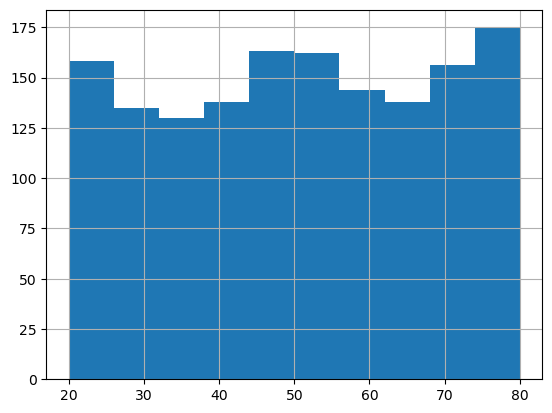

In [22]:
c1['Age'].hist()

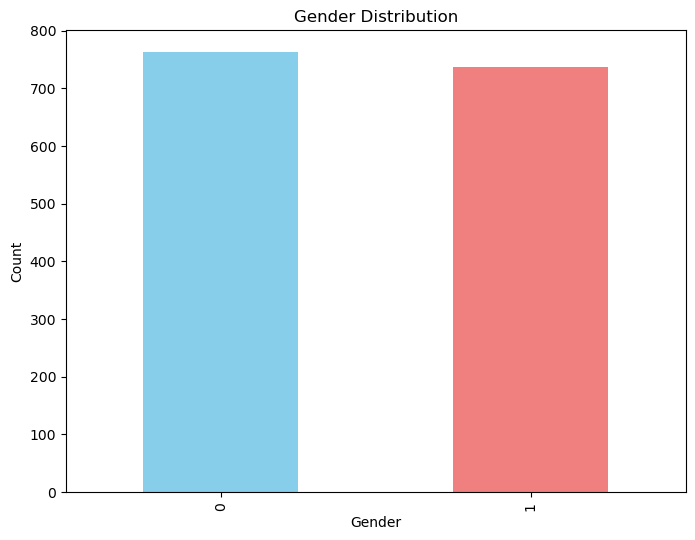

In [23]:
gender_counts = c1["Gender"].value_counts()
plt.figure(figsize=(8, 6))  
gender_counts.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")  
plt.show()

<AxesSubplot:>

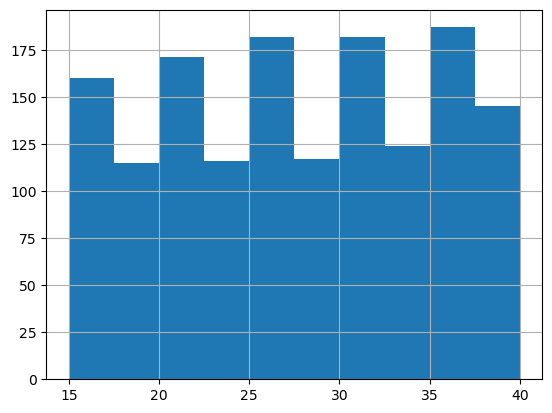

In [24]:
c1['BMI'].hist()

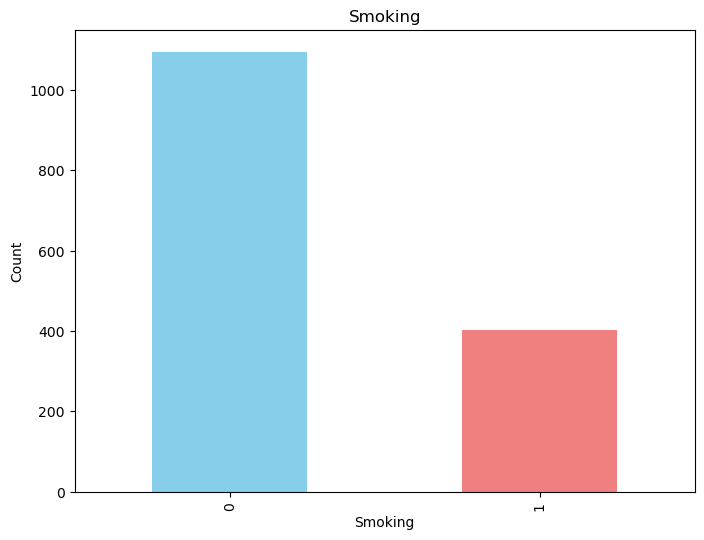

In [25]:
smoking_counts = c1["Smoking"].value_counts()
plt.figure(figsize=(8, 6))  
smoking_counts.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")  
plt.show()

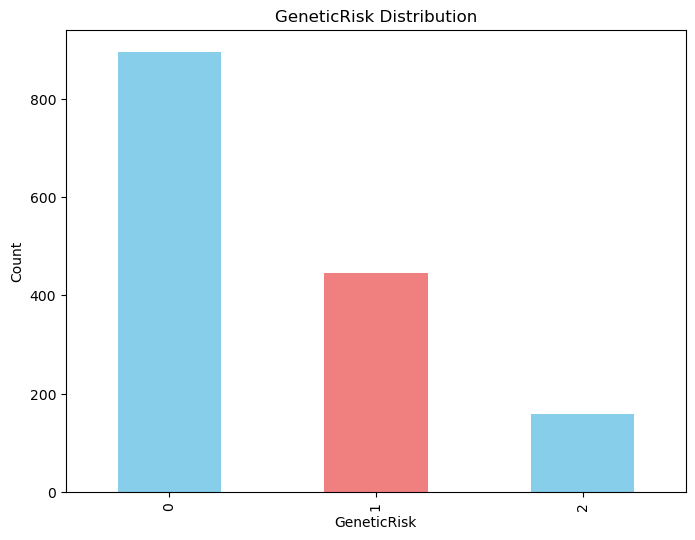

In [26]:
geneticrisk_counts = c1["GeneticRisk"].value_counts()
plt.figure(figsize=(8, 6))  
geneticrisk_counts.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("GeneticRisk Distribution")
plt.xlabel("GeneticRisk")
plt.ylabel("Count")  
plt.show()

<AxesSubplot:>

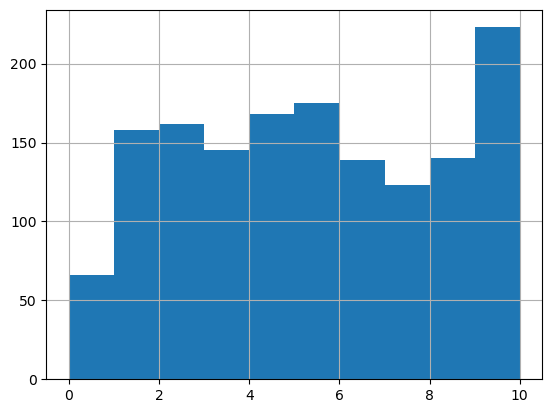

In [27]:
c1['PhysicalActivity'].hist()

<AxesSubplot:>

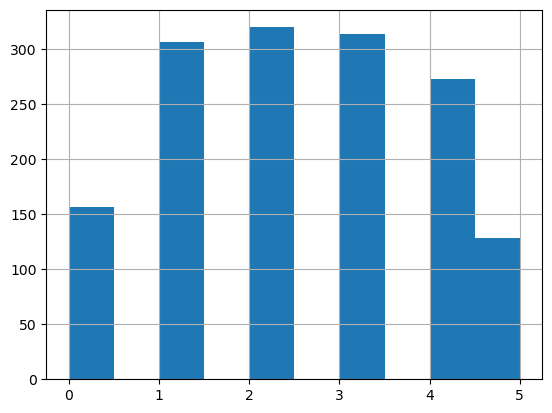

In [28]:
c1['AlcoholIntake'].hist()

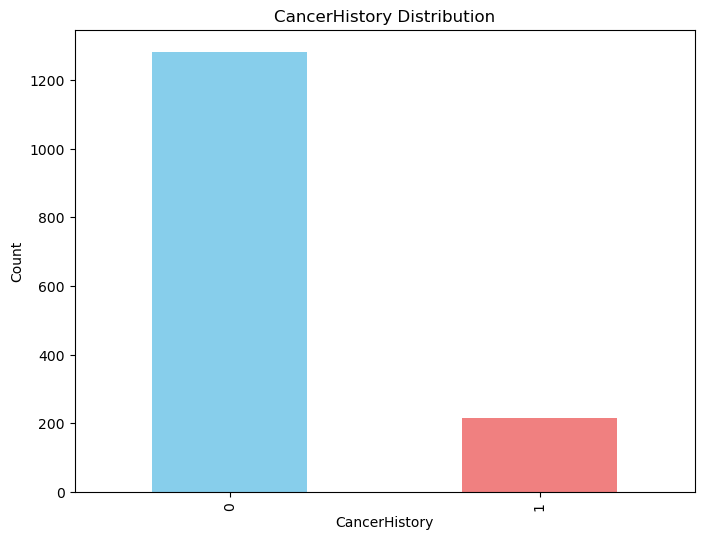

In [29]:
cancerhistory_counts = c1["CancerHistory"].value_counts()
plt.figure(figsize=(8, 6))  
cancerhistory_counts.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("CancerHistory Distribution")
plt.xlabel("CancerHistory")
plt.ylabel("Count")  
plt.show()

In [30]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1499 non-null   int64
 1   Gender            1499 non-null   int64
 2   BMI               1499 non-null   int64
 3   Smoking           1499 non-null   int64
 4   GeneticRisk       1499 non-null   int64
 5   PhysicalActivity  1499 non-null   int64
 6   AlcoholIntake     1499 non-null   int64
 7   CancerHistory     1499 non-null   int64
 8   Diagnosis         1499 non-null   int64
dtypes: int64(9)
memory usage: 117.1 KB


# Spliting

In [31]:
x=c1.drop("Diagnosis",axis=1)
y=c1['Diagnosis']

In spliting, the attributes are divided to x and y where the target attribute is dropped from x and added to y

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
x_scaled = scaler.fit_transform(x)

# Train, Test, and Spliting

Here the dataset is divided into testing data and training data. The ratio is 20:80 (for testing to training).

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
382,44,0,29,0,0,7,4,0
538,61,0,18,0,1,5,5,0
1493,59,1,39,0,0,1,2,0
1113,22,1,37,0,0,4,2,0
324,60,0,28,0,0,9,5,0


In [38]:
x_train.tail()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
1131,40,0,28,0,0,5,1,0
1295,25,0,39,1,0,5,4,0
860,58,0,40,0,0,9,3,0
1460,31,0,32,0,1,6,2,0
1127,47,0,22,1,0,5,2,0


In [39]:
x_train.shape

(1199, 8)

In [40]:
y_train.shape

(1199,)

In [41]:
y_train.head()

382     0
538     0
1493    1
1113    0
324     0
Name: Diagnosis, dtype: int64

In [42]:
y_train.tail()

1131    0
1295    0
860     0
1460    1
1127    0
Name: Diagnosis, dtype: int64

In [43]:
x_test.shape

(300, 8)

In [44]:
y_test.shape

(300,)

# Model Building

# KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)
predict_knn1=knn1.predict(x_test)
training_accuracy=knn1.score(x_train,y_train)
testing_accuracy=knn1.score(x_test,y_test)
print("*** KNeighborsClassifier ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test,predict_knn1))
print("** Confusion Matrix **")
print(confusion_matrix(y_test,predict_knn1))
print("** Classification Report **")
print(classification_report(y_test,predict_knn1))

*** KNeighborsClassifier ***
Training Accuracy :  0.7889908256880734
Testing Accuracy :  0.7
Accuracy Score :  0.7
** Confusion Matrix **
[[166  27]
 [ 63  44]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       193
           1       0.62      0.41      0.49       107

    accuracy                           0.70       300
   macro avg       0.67      0.64      0.64       300
weighted avg       0.69      0.70      0.68       300



C:\Users\Harshini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Harshini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
def Logistic(x_train, x_test, y_train, y_test):
    lgr = LogisticRegression(max_iter=1000)  # Increase max_iter
    logistic = lgr.fit(x_train, y_train)
    predict_logistic = logistic.predict(x_test)
    training_accuracy = logistic.score(x_train, y_train)
    testing_accuracy = logistic.score(x_test, y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ", training_accuracy)
    print("Testing Accuracy : ", testing_accuracy)
    print("Accuracy Score : ", accuracy_score(y_test, predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test, predict_logistic))
Logistic(x_train, x_test, y_train, y_test)

*** Logistic Regression ***
Training Accuracy :  0.8507089241034195
Testing Accuracy :  0.86
Accuracy Score :  0.86
** Confusion Matrix **
[[174  19]
 [ 23  84]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       193
           1       0.82      0.79      0.80       107

    accuracy                           0.86       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



# Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()
def Random_Forest(x_train,x_test,y_train,y_test):
    radf=RandomForestClassifier()
    radf.fit(x_train,y_train)
    predict_random=radf.predict(x_test)
    training_accuracy=radf.score(x_train,y_train)
    testing_accuracy=radf.score(x_test,y_test)
    print("*** Random Forest ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_test, predict_random))
Random_Forest(x_train,x_test,y_train,y_test)

*** Random Forest ***
Training Accuracy :  1.0
Testing Accuracy :  0.91
Accuracy Score :  0.91
** Confusion Matrix **
[[180  13]
 [ 14  93]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       193
           1       0.88      0.87      0.87       107

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def DecisionTree(x_train, x_test, y_train, y_test):
    dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    decision_tree = dt_classifier.fit(x_train, y_train)
    predict_decision_tree = decision_tree.predict(x_test)
    training_accuracy = decision_tree.score(x_train, y_train)
    testing_accuracy = decision_tree.score(x_test, y_test)

    print("*** Decision Tree Classifier ***")
    print("Training Accuracy:", training_accuracy)
    print("Testing Accuracy:", testing_accuracy)
    print("Accuracy Score:", accuracy_score(y_test, predict_decision_tree))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_decision_tree))
    print("** Classification Report **")
    print(classification_report(y_test, predict_decision_tree))

# Example usage:
DecisionTree(x_train, x_test, y_train, y_test)


*** Decision Tree Classifier ***
Training Accuracy: 0.7931609674728941
Testing Accuracy: 0.7633333333333333
Accuracy Score: 0.7633333333333333
** Confusion Matrix **
[[182  11]
 [ 60  47]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       193
           1       0.81      0.44      0.57       107

    accuracy                           0.76       300
   macro avg       0.78      0.69      0.70       300
weighted avg       0.77      0.76      0.74       300



# Cross Validation

In [49]:
from sklearn.linear_model import LogisticRegression
def Logistic(x_train, x_test, y_train, y_test):
    lgr = LogisticRegression(max_iter=1000)  # Increase max_iter
    logistic = lgr.fit(x_train, y_train)
    predict_logistic = logistic.predict(x_test)
    training_accuracy = logistic.score(x_train, y_train)
    testing_accuracy = logistic.score(x_test, y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ", training_accuracy)
    print("Testing Accuracy : ", testing_accuracy)
    print("Accuracy Score : ", accuracy_score(y_test, predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test, predict_logistic))
Logistic(x_train, x_test, y_train, y_test)

*** Logistic Regression ***
Training Accuracy :  0.8507089241034195
Testing Accuracy :  0.86
Accuracy Score :  0.86
** Confusion Matrix **
[[174  19]
 [ 23  84]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       193
           1       0.82      0.79      0.80       107

    accuracy                           0.86       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



Based on these metrics, Random Forest appears to be the best-performing model due to its highest testing accuracy, good balance between precision and recall, and the highest cross-validation mean accuracy.

# Hypertuning

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.922526198439242


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the final model
final_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
final_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = final_model.predict(x_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9233333333333333
Confusion Matrix:
 [[183  10]
 [ 13  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       193
           1       0.90      0.88      0.89       107

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300



In [52]:
Age = 38
Gender = 1
BMI = 36
Smoking = 0
GeneticRisk = 2
PhysicalActivity = 8
AlcoholIntake = 3
CancerHistory = 0
names = [Age, Gender, BMI, Smoking, GeneticRisk, PhysicalActivity, AlcoholIntake, CancerHistory]
input_features = pd.DataFrame([names], columns=x_train.columns)  # Ensure the input has valid feature names
prediction = final_model.predict(input_features)
print(prediction)

[1]


# Saving

In [53]:
import pickle 
with open("randmf.pkl", 'wb') as file:
    pickle.dump(final_model, file)